# Problem #1 - Flexible vs. Inflexible [9pts]
## For each of the parts (a) through (c), indicate whether we would generally expect the performance of a flexible machine learning method (e.g., neural network) to be better or worse than an inflexible method (e.g., linear regression). Justify your answer.

##(a)
**[3pts] The sample size n is extremely large, and the number of predictors p is small.**

We would expect an inflexible method to perform better here, as if p is sufficiently small enough and n is large enough, a general linear model is adequate to fit well with the data and a more complex model wouldn't be necessary


##(b)
**[3pts] The number of predictors p is extremely large, and the number of observations
n is small.**

We believe the model would be inflexible since a small number of observations makes it difficult to observe patterns in the data and adds to the risk of overfitting. Further, visualizing a large number of predictors in a multi-dimensional space with minimal observations makes the data points sparse.

##(c)
**[3pts] The relationship between the predictors and response is highly non-linear.**

Since the relationship between the predictors and the response is highly non-linear, we believe the flexible model will perform better. This is because a logistic regression model would be very restrictive for data featuring non-linear behavior. As such, having a neural network might be better for visualizing patterns in the data.

# Problem #2 - KNN [21pts]
## For this problem, we are going to use KNN to predict the house value based on a small sample of the Boston housing data shown in Figure [1].

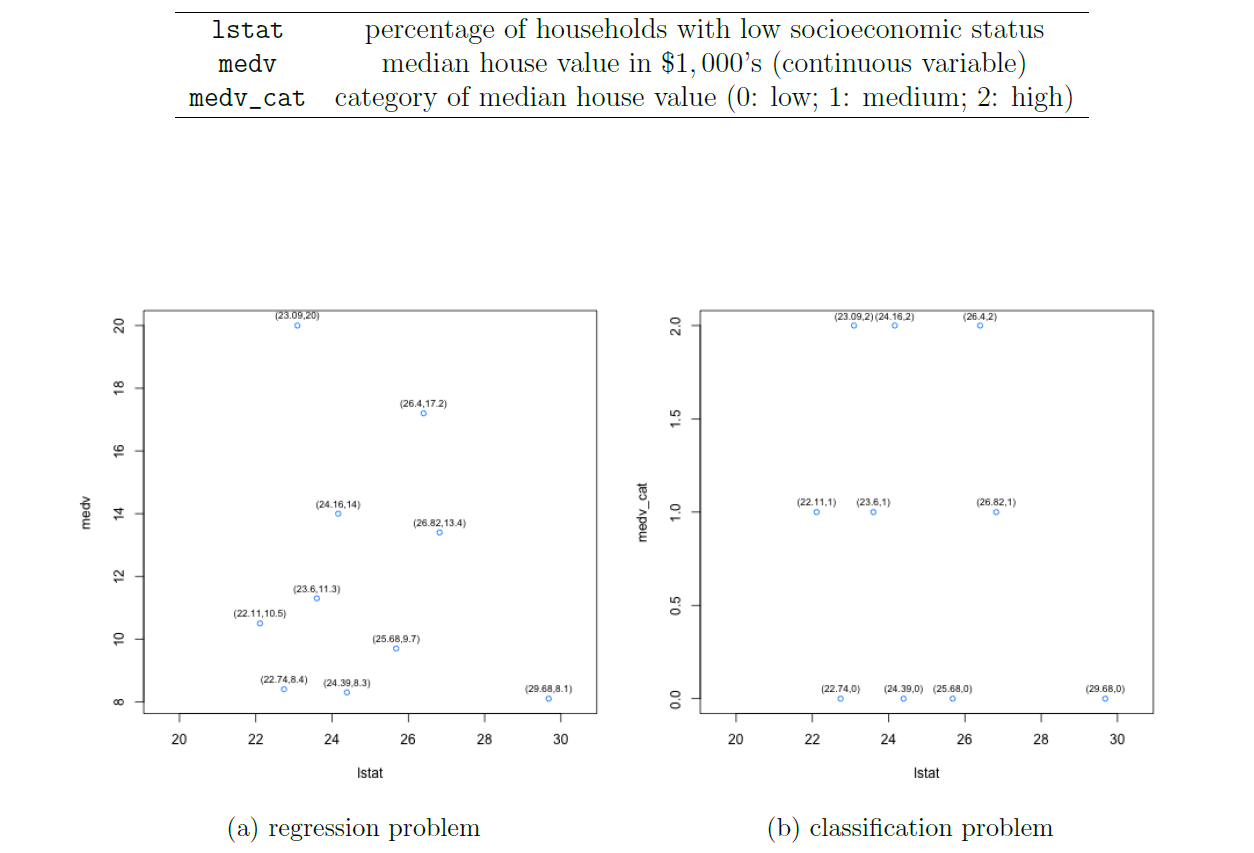

## (a) Regression Problem
**[4pts] Use Figure 1a to predict medv given lstat=25 with K = 1 and K = 5.**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

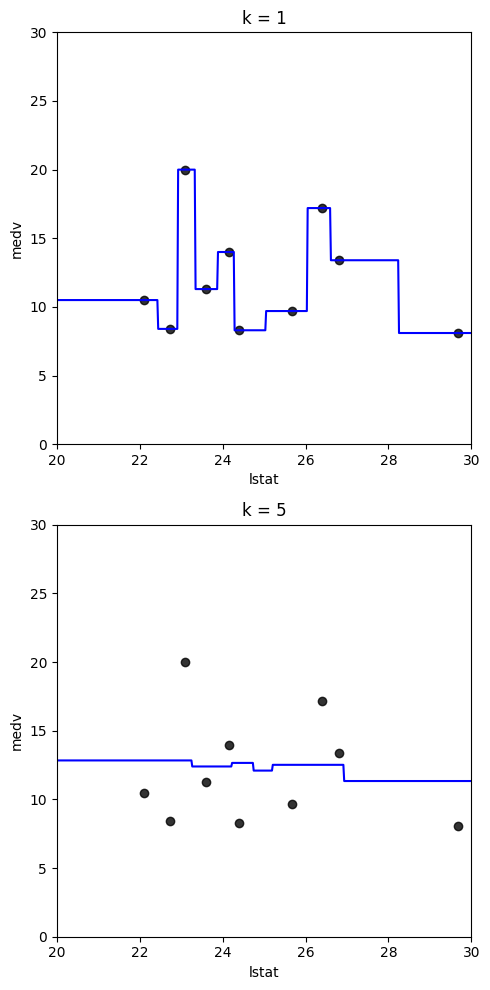

In [ ]:
lstat = [22.11, 22.74, 23.09, 23.6, 24.16, 24.39, 25.68, 26.4, 26.82, 29.68]
medv = [10.5, 8.4, 20, 11.3, 14, 8.3, 9.7, 17.2, 13.4, 8.1]

df_train = pd.DataFrame({'lstat': lstat, 'medv': medv})

X_train = np.array(lstat).reshape(-1, 1)
y_train = np.array(medv)

fig, axes = plt.subplots(2, 1, figsize = (5,10))

n_neighbors = [1, 5]

T = np.linspace(20, 30, 500)[:, np.newaxis]

for i, n in enumerate(n_neighbors):
    knn = KNeighborsRegressor(n, weights = 'uniform')
    y_pred = knn.fit(X_train, y_train).predict(T)
    fit_df = pd.DataFrame({"T": T.reshape((-1,)), "y_pred": y_pred.reshape((-1,))})

    sns.lineplot(data = fit_df, x = 'T', y = 'y_pred', color = 'blue', ax = axes[i])
    sns.regplot(data = df_train, x = 'lstat', y = 'medv', ax = axes[i], fit_reg = False, scatter_kws={"color": "black"}).set(title = f'k = {n}')

    axes[i].set_xlim([20, 30])
    axes[i].set_ylim([0, 30])

fig.tight_layout()

The predicted medv at lstat = 25 (K = 1) is 8.3 at lstat = 24.39. Conversely, the predicted medv for lstat = 25 (K = 5) is 12.1. This is because the 5 closest values to lstat = 25 are {24.39, 25.68, 24.16, 26.4, 23.6} which correspond to {8.3, 9.7, 14, 17.2, 11.3} whose average is 12.1.

##(b)
**[3pts] Repeat (a) for lstat=27.**

The predicted medv at lstat = 27 (K = 1) is 13.4 at lstat = 26.82. Meanwhile, the predicted medv for lstat = 27 (K = 5) is 11.34. This is because the 5 closest values to lstat = 27 are {29.68, 26.82, 26.4, 25.68, 24.39} which correspond to {8.1, 13.4, 17.2, 9.7, 8.3} whose average is 11.34.

##(c) Classification Problem
**[4pts] Use Figure 1b to predict medv_cat given lstat=25 with K = 1 and K = 5.**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

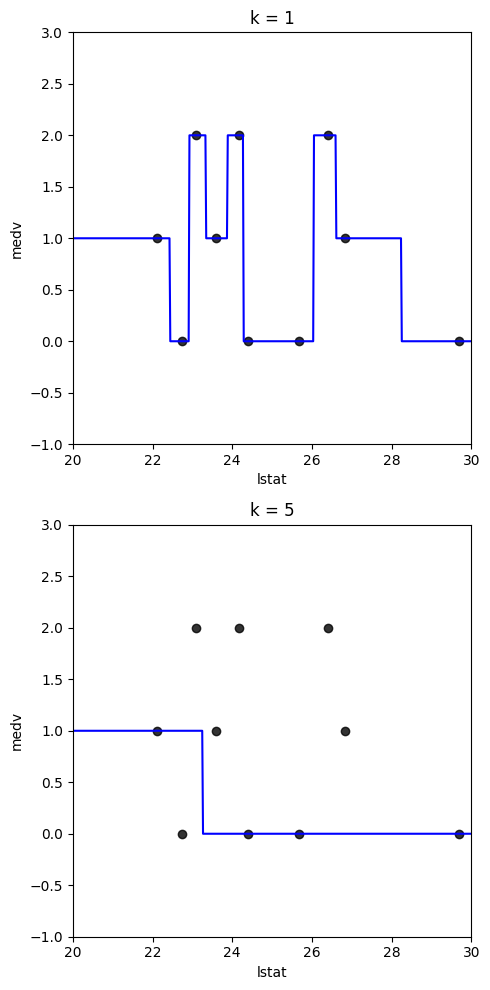

In [ ]:
lstat = [22.11, 22.74, 23.09, 23.6, 24.16, 24.39, 25.68, 26.4, 26.82, 29.68]
medv = [1, 0, 2, 1, 2, 0, 0, 2, 1, 0]

X_train = np.array(lstat).reshape(-1, 1)
y_train_cat = np.array(medv)

df_train = pd.DataFrame({'lstat': X_train.reshape(-1,), 'medv': y_train_cat.reshape(-1,)})

fig, axes = plt.subplots(2, 1, figsize = (5,10))

n_neighbors = [1, 5]

T = np.linspace(20, 30, 500)[:, np.newaxis]

for i, n in enumerate(n_neighbors):
    knn = KNeighborsClassifier(n, weights = 'uniform')
    y_pred = knn.fit(X_train, y_train_cat).predict(T)
    fit_df = pd.DataFrame({"T": T.reshape((-1,)), "y_pred": y_pred.reshape((-1,))})

    sns.lineplot(data = fit_df, x = 'T', y = 'y_pred', color = 'blue', ax = axes[i])
    sns.regplot(data = df_train, x = 'lstat', y = 'medv', ax = axes[i], fit_reg = False, scatter_kws={"color": "black"}).set(title = f'k = {n}')

    axes[i].set_xlim([20, 30])
    axes[i].set_ylim([-1, 3])

fig.tight_layout()

The predicted medv value for lstat = 25 (K = 1) is 0 at lstat = 24.39. However, the predicted medv value for lstat = 25 (K = 5) is 1. This is because the 5 closest values to lstat = 25 are {25.68, 24.39, 24.16, 26.4, 23.6} whose values correspond to {0, 0, 2, 2, 1} whose average is 1.

##(d)
**[3pts] Repeat (c) for lstat=27.**

The predicted medv value for lstat = 27 (K = 1) is 1 at lstat = 26.82. Meanwhile, the predicted medv value for lstat = 27 (K = 5) is also 1. This is because the 5 closest values to lstat = 27 are {26.82, 26.4, 25.68, 24.39, 24.16} which correspond to {1, 2, 0, 0, 2} whose average is 1.

##(e)
**[3pts] If we increase K in KNN, is the model more flexible or less flexible? Explain why.**

If we increase the K in KNN, the model is less flexible because as we increase the K, the model converges to a straight line. Therefore, when the K is sufficiently large, the model will become a flat line and the variability will decrease. As such, the model becomes less flexible.

##(f)
**[4pts] How do the square of bias, variance, training MSE, test MSE, and irreducible error change with K for KNN regression? Explain why.**

As K increases, the bias increases but the variance decreases. Increasing the K will allow us to generalize over more data. Therefore, we decrease the variance in our model. That said, by increasing K, we run into the issue of overfitting to a particular set. While we decrease variance by using a higher K, we also introduce more bias.


Furthermore, as K increases, the training MSE will decrease because we are looking at more data to make a prediction, decreasing sample error. That said, this does not necessarily apply to test MSE. Since the MSE is trained on a particular set, overfitting can become an issue when looking at a completely different set. Resultantly, increasing K values does not necessarily mean lower training MSE.


Finally, regardless of whether K increases or decreases, our irreducible error does not change. This is because irreducible error is inherent to the data we are using. Therefore, while increasing the K decreases the variance of our predictions, it does not change the irreducible error.


# Problem #3 - Degree Flexibility [31 pts]
## In this problem, we are going to use simulated data sets to better understand how the square of bias, variance, irreducible error, and MSE vary with model flexibility.

##(a)
**[3pts] Generate a simulated data set as follows:**

In [ ]:
import numpy as np
import pandas as pd

def f(x):
    return x ** 5 - 2 * x ** 4 + x ** 3

def get_sim_data(f, sample_size=100, std=0.01):
    x = np.random.uniform(0, 1, sample_size)
    y = f(x) + np.random.normal(0, std, sample_size)
    df = pd.DataFrame({'x': x, 'y': y})
    return df

df = get_sim_data(f)


**In this data set, what is the number of observations n and what is the number of features p (different powers of x are counted as different features)? Write out the model used to generate the data in equation form.**

The number of observations n is 100 and the number of features p is 3.

Equation form: f(x) = x^5 - 2x^4 + x^3

##(b)
**[4pts] Fit the polynomial functions of degree from 0 to 15 using the simulated data in
(a):**

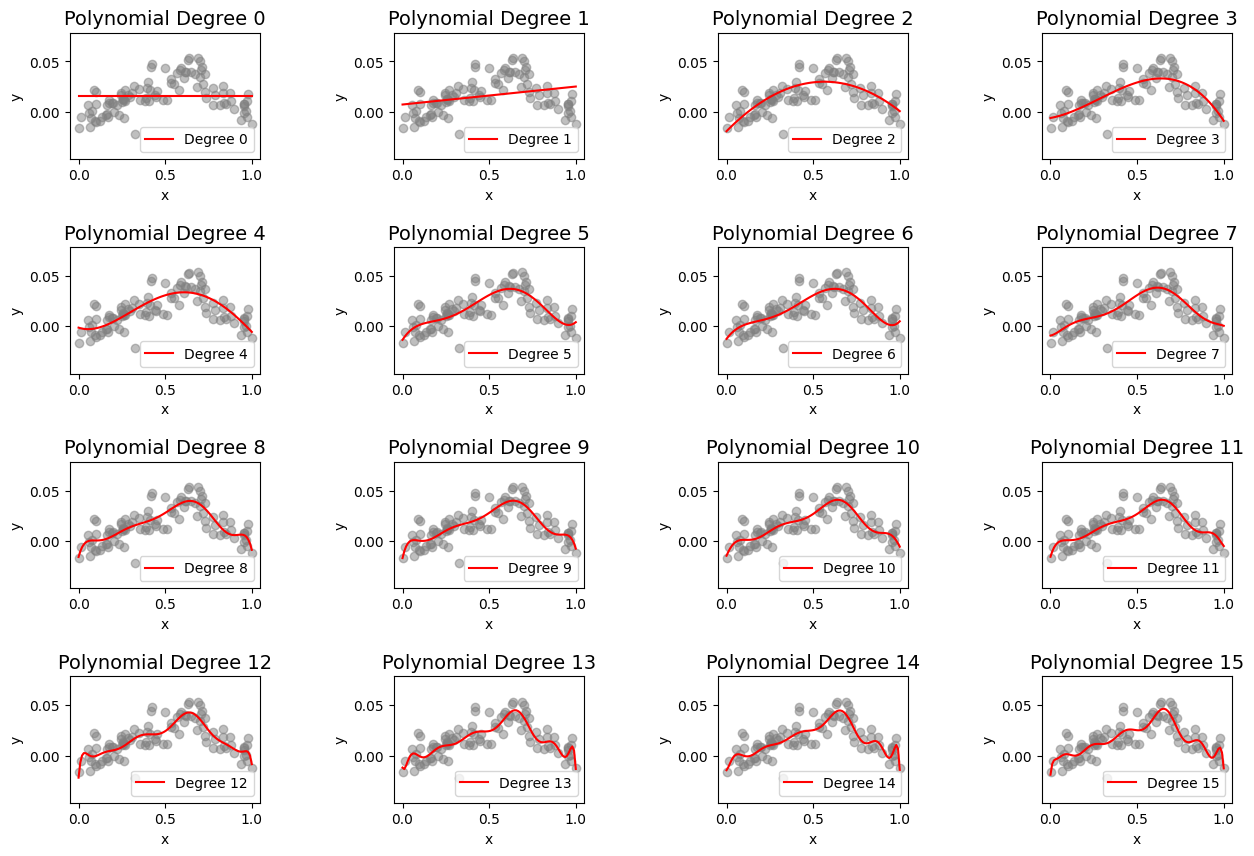

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = df[['x']].values
y = df['y'].values

degrees = range(16)
fig, axes = plt.subplots(4, 4, figsize=(15, 10))
x_plot = np.linspace(0, 1, 100).reshape(-1, 1)

y_min, y_max = min(y) - 0.025, max(y) + 0.025

for d, ax in zip(degrees, axes.ravel()):
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)

    X_plot_poly = poly.transform(x_plot)
    y_plot = model.predict(X_plot_poly)

    ax.scatter(X, y, color='gray', alpha=0.5)
    ax.plot(x_plot, y_plot, label=f"Degree {d}", color='red')
    ax.set_title(f"Polynomial Degree {d}", fontsize=14)
    ax.set_xlabel("x", fontsize=10)
    ax.set_ylabel("y", fontsize=10)
    ax.legend(fontsize=10)
    ax.set_ylim(y_min, y_max)

plt.subplots_adjust(hspace=0.7, wspace=0.7)
plt.show()


##(c)
**[3pts] Predict the response at x0 = 0.5 using the fitted functions in (b).**

In [ ]:
x0 = np.array([[0.5]])

predictions = {}

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)

    x0_poly = poly.transform(x0)
    y0_pred = model.predict(x0_poly)[0]

    predictions[d] = y0_pred

for d, y_pred in predictions.items():
    print(f"Degree {d}: Predicted y at x0 = 0.5 is {y_pred:.4f}")

Degree 0: Predicted y at x0 = 0.5 is 0.0158
Degree 1: Predicted y at x0 = 0.5 is 0.0161
Degree 2: Predicted y at x0 = 0.5 is 0.0292
Degree 3: Predicted y at x0 = 0.5 is 0.0291
Degree 4: Predicted y at x0 = 0.5 is 0.0308
Degree 5: Predicted y at x0 = 0.5 is 0.0311
Degree 6: Predicted y at x0 = 0.5 is 0.0308
Degree 7: Predicted y at x0 = 0.5 is 0.0309
Degree 8: Predicted y at x0 = 0.5 is 0.0279
Degree 9: Predicted y at x0 = 0.5 is 0.0279
Degree 10: Predicted y at x0 = 0.5 is 0.0268
Degree 11: Predicted y at x0 = 0.5 is 0.0268
Degree 12: Predicted y at x0 = 0.5 is 0.0242
Degree 13: Predicted y at x0 = 0.5 is 0.0242
Degree 14: Predicted y at x0 = 0.5 is 0.0252
Degree 15: Predicted y at x0 = 0.5 is 0.0251


##(d) Bootstrapping
**[3pts] Repeat (a)-(c) for 250 times.**

In [ ]:
def bootstrap_predictions(X, y, degrees, x0, n_iterations=250):
    predictions = {d: [] for d in degrees}

    for _ in range(n_iterations):
        indices = np.random.choice(len(X), size=len(X), replace=True)
        X_bootstrap = X[indices]
        y_bootstrap = y[indices]

        for d in degrees:
            poly = PolynomialFeatures(degree=d)
            X_poly = poly.fit_transform(X_bootstrap)
            model = LinearRegression()
            model.fit(X_poly, y_bootstrap)

            x0_poly = poly.transform(x0.reshape(1, -1))
            y0_pred = model.predict(x0_poly)[0]

            predictions[d].append(y0_pred)

    return predictions

# bootstrap simulations
bootstrap_preds = bootstrap_predictions(X, y, degrees, x0)

#  mean and standard deviation of predictions at x0
for d in degrees:
    preds = bootstrap_preds[d]
    print(f"Degree {d}: Mean prediction at x0 = {x0} is {np.mean(preds):.4f}, Std Dev is {np.std(preds):.4f}")


Degree 0: Mean prediction at x0 = [[0.5]] is 0.0158, Std Dev is 0.0016
Degree 1: Mean prediction at x0 = [[0.5]] is 0.0162, Std Dev is 0.0016
Degree 2: Mean prediction at x0 = [[0.5]] is 0.0292, Std Dev is 0.0019
Degree 3: Mean prediction at x0 = [[0.5]] is 0.0291, Std Dev is 0.0017
Degree 4: Mean prediction at x0 = [[0.5]] is 0.0310, Std Dev is 0.0024
Degree 5: Mean prediction at x0 = [[0.5]] is 0.0311, Std Dev is 0.0023
Degree 6: Mean prediction at x0 = [[0.5]] is 0.0307, Std Dev is 0.0028
Degree 7: Mean prediction at x0 = [[0.5]] is 0.0306, Std Dev is 0.0029
Degree 8: Mean prediction at x0 = [[0.5]] is 0.0280, Std Dev is 0.0031
Degree 9: Mean prediction at x0 = [[0.5]] is 0.0279, Std Dev is 0.0032
Degree 10: Mean prediction at x0 = [[0.5]] is 0.0264, Std Dev is 0.0036
Degree 11: Mean prediction at x0 = [[0.5]] is 0.0263, Std Dev is 0.0035
Degree 12: Mean prediction at x0 = [[0.5]] is 0.0246, Std Dev is 0.0041
Degree 13: Mean prediction at x0 = [[0.5]] is 0.0248, Std Dev is 0.0040
De

##(e)
**[4pts] Use (d) to calculate the square of bias for the fitted polynomials.**

In [ ]:
bias_squared = {}
true_value = f(x0)

for d in degrees:
    preds = np.array(bootstrap_preds[d])
    bias_squared[d] = (np.mean(preds) - true_value) ** 2

print("Bias Squared for each polynomial degree:", bias_squared)


Bias Squared for each polynomial degree: {0: array([[0.00023931]]), 1: array([[0.00022624]]), 2: array([[4.10431285e-06]]), 3: array([[4.56107217e-06]]), 4: array([[7.7910273e-08]]), 5: array([[1.09486133e-08]]), 6: array([[3.48318543e-07]]), 7: array([[4.00498682e-07]]), 8: array([[1.06869978e-05]]), 9: array([[1.12227328e-05]]), 10: array([[2.30555044e-05]]), 11: array([[2.42284842e-05]]), 12: array([[4.4427359e-05]]), 13: array([[4.09802911e-05]]), 14: array([[4.06321726e-05]]), 15: array([[4.09417352e-05]])}


##(f)
**[4pts] Use (d) to calculate the variance for the fitted polynomials.**

In [ ]:
variance = {}

for d in degrees:
    preds = np.array(bootstrap_preds[d])
    variance[d] = np.var(preds)

print("Variance for each polynomial degree:", variance)


Variance for each polynomial degree: {0: 2.644572029341644e-06, 1: 2.524894812480259e-06, 2: 3.516862195370654e-06, 3: 3.056654587398654e-06, 4: 5.5648381351437e-06, 5: 5.482911478227839e-06, 6: 8.011357899748166e-06, 7: 8.335938831651822e-06, 8: 9.434633239526406e-06, 9: 1.002406461848384e-05, 10: 1.2973163414400509e-05, 11: 1.2534493088313784e-05, 12: 1.718205664465562e-05, 13: 1.5887424169074893e-05, 14: 2.10638540832482e-05, 15: 2.144714438351454e-05}


##(g)
**[3pts] Calculate the irreducible error based on the data generating process.**

In [ ]:
irreducible_error = 0.01 ** 2
print("Irreducible Error:", irreducible_error)

Irreducible Error: 0.0001


The irreducible error is the variance of the noise term in the data generation process. Given that the noise follows a normal distribution with standard deviation sigma = 0.01, the irreducible error would be sigma^2.

##(h)
**[3pts] Calculate the MSE based on (e), (f), and (g).**

In [ ]:
mse = {}

for d in degrees:
    mse[d] = bias_squared[d] + variance[d] + irreducible_error

print("MSE for each polynomial degree:", mse)

MSE for each polynomial degree: {0: array([[0.00034196]]), 1: array([[0.00032876]]), 2: array([[0.00010762]]), 3: array([[0.00010762]]), 4: array([[0.00010564]]), 5: array([[0.00010549]]), 6: array([[0.00010836]]), 7: array([[0.00010874]]), 8: array([[0.00012012]]), 9: array([[0.00012125]]), 10: array([[0.00013603]]), 11: array([[0.00013676]]), 12: array([[0.00016161]]), 13: array([[0.00015687]]), 14: array([[0.0001617]]), 15: array([[0.00016239]])}


##(i)
**[4pts] Plot how the square of bias, variance, irreducible error, and MSE vary with the degree of polynomials. Explain your findings.**

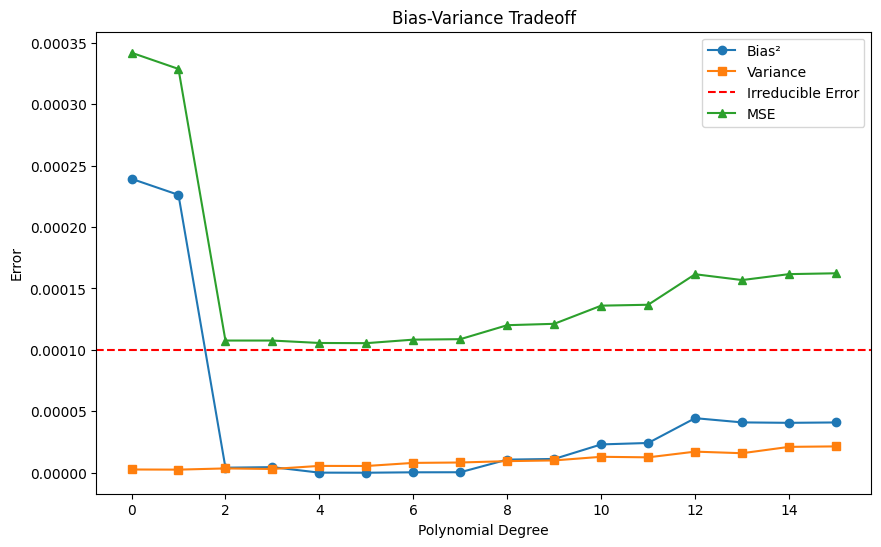

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

#convert bias_squared, variance and mse values to 1D array
plt.plot(degrees, [v.item() for v in bias_squared.values()], label="Bias²", marker='o')
plt.plot(degrees, [v for v in variance.values()], label="Variance", marker='s')
plt.axhline(y=irreducible_error, color='r', linestyle='--', label="Irreducible Error")
plt.plot(degrees, [v.item() for v in mse.values()], label="MSE", marker='^')

plt.xlabel("Polynomial Degree")
plt.ylabel("Error")
plt.title("Bias-Variance Tradeoff")
plt.legend()
plt.show()

The plot shows that bias decreases as polynomial degree increases, while variance rises, albeit very slightly, at higher degrees due to overfitting. The optimal model complexity occurs around degree 3-4, where MSE is minimized by balancing bias and variance. Beyond this point, overfitting increases variance, causing MSE to rise despite low bias.

# Problem #4 - LDA vs. QDA [21pts]
**In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the Auto data set. The Auto data set has gas mileage, horsepower, and other information for cars. You can find the description of this data set at https://rdrr.io/cran/ISLR/man/Auto.html. To load the data use the following code where the last line is to remove the observations with missing value in horsepower.**

In [ ]:
!pip install ISLP

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from ISLP import load_data

df = load_data('Auto')
df = df[df['horsepower'].notna()]

In [ ]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


##(a)

**[3pts] Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. (Hint: You could compute the median using the median() function. You could add the mpg01 column in df.)**

In [ ]:
median_mpg = df['mpg'].median()
df['mpg01'] = (df['mpg'] > median_mpg).astype(int)

##(b)
**[3pts] Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.(Hint: You may find pd.plotting.scatter_matrix() helpful and you can set the argument figsize as (10, 10))**

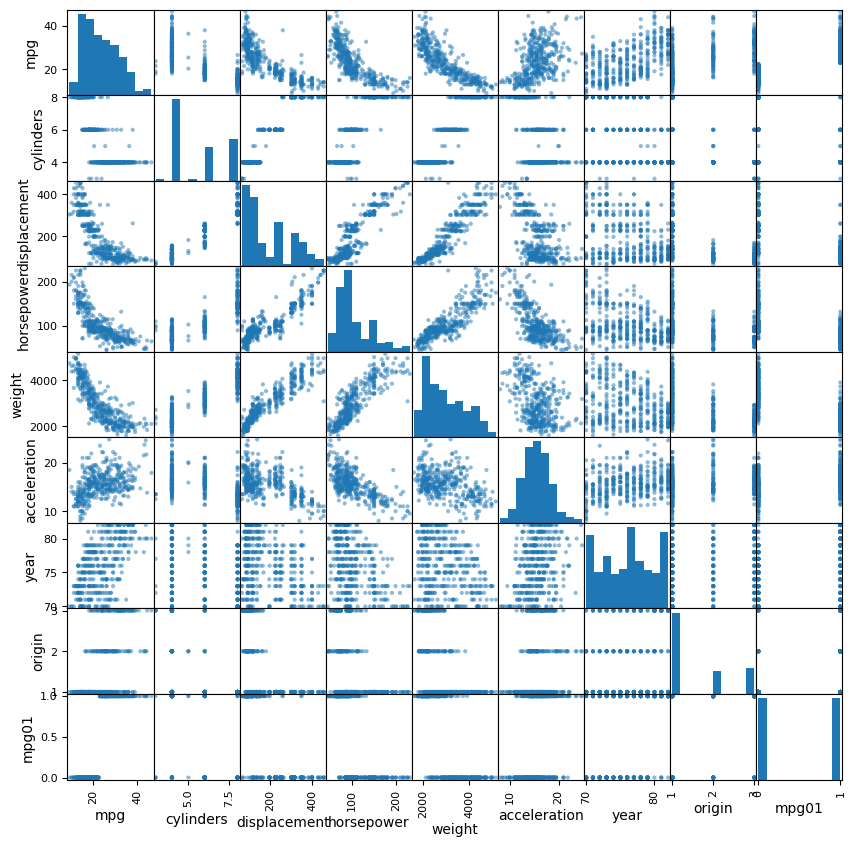

In [ ]:
pd.plotting.scatter_matrix(df, figsize=(10, 10), diagonal='hist')
plt.show()

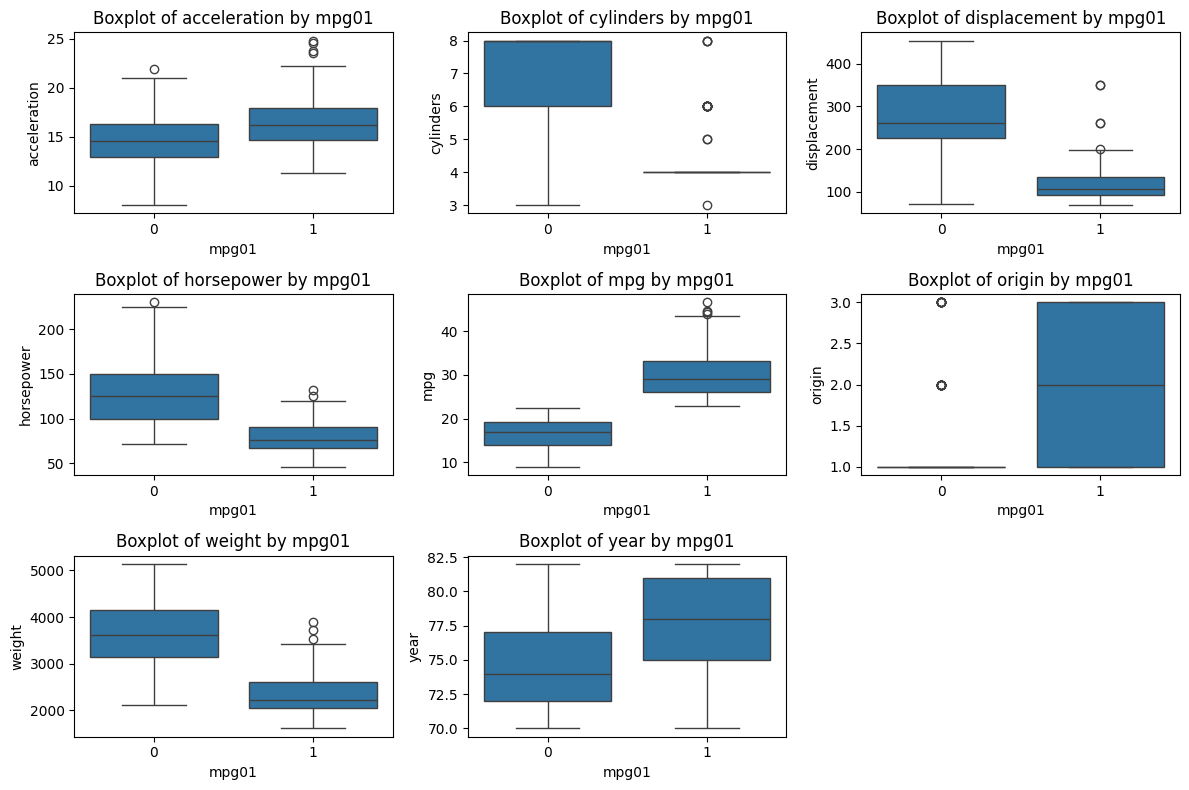

In [ ]:
import seaborn as sns

features = df.columns.difference(['mpg01'])

plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='mpg01', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by mpg01')

plt.tight_layout()
plt.show()

It looks like the features that might predict mpg01 would include cyllinders, weight, displacement, and horsepower.

##(c)
**[3pts] Split the data into a training set and a test set with 80% observations in the training set and 20% observations in the test set. (Hint: You may find from sklearn.model_selection import train_test_split helpful)**

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('mpg01', axis=1)
y = df['mpg01']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1)


## (d)
**[3pts] Perform logistic regression on the training data in order to predict mpg01 using cylinders, weight, displacement, and horsepower. What is the test error of the model obtained? (Hint: You may find from sklearn linear_model import LogisticRegression and predict_proba() helpful)**

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression

X_train_subset = X_train[['cylinders', 'weight', 'displacement', 'horsepower']]
X_test_subset = X_test[['cylinders', 'weight', 'displacement', 'horsepower']]

log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train_subset, y_train)

y_pred = log_reg.predict(X_test_subset)

test_error = np.mean(y_pred != y_test)
print(f"Test error of logistic regression model: {test_error}")

Test error of logistic regression model: 0.10126582278481013


##(e)
**[3pts] Perform LDA on the training data in order to predict mpg01 using cylinders, weight, displacement, and horsepower. What is the test error of the model obtained?
(Hint: You may find the following function helpful)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()
lda.fit(X_train_subset, y_train)

y_pred_lda = lda.predict(X_test_subset)

test_error_lda = np.mean(y_pred_lda != y_test)
print(f"Test error of LDA model: {test_error_lda}")

Test error of LDA model: 0.06329113924050633


##(f)
**[3pts] Perform QDA on the training data in order to predict mpg01 using cylinders,
weight, displacement, and horsepower. What is the test error of the model obtained?
(Hint: You may find the following function helpful)
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA**


In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

qda = QDA()
qda.fit(X_train_subset, y_train)

y_pred_qda = qda.predict(X_test_subset)

test_error_qda = np.mean(y_pred_qda != y_test)
print(f"Test error of QDA model: {test_error_qda}")

Test error of QDA model: 0.0379746835443038


##(g)
**[3pts] Perform KNN on the training data, with several values of K, in order to predict mpg01 using cylinders, weight, displacement, and horsepower. What test errors do you obtain? Which value of K seems to perform the best on this data set? (Hint: You may find the following function helpful) from sklearn.neighbors import KNeighborsClassifier**


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k_values = [1, 3, 5, 7, 9, 11]
test_errors_knn = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_subset, y_train)
    y_pred_knn = knn.predict(X_test_subset)
    test_error_knn = np.mean(y_pred_knn != y_test)
    test_errors_knn.append(test_error_knn)
    print(f"Test error for KNN (k={k}): {test_error_knn}")

best_k = k_values[np.argmin(test_errors_knn)]
print(f"\nBest K value: {best_k} with test error: {min(test_errors_knn)}")

Test error for KNN (k=1): 0.12658227848101267
Test error for KNN (k=3): 0.10126582278481013
Test error for KNN (k=5): 0.12658227848101267
Test error for KNN (k=7): 0.12658227848101267
Test error for KNN (k=9): 0.10126582278481013
Test error for KNN (k=11): 0.08860759493670886

Best K value: 11 with test error: 0.08860759493670886


# Problem #5 - Cross-Validation [18pts]
**We will now perform cross-validation on a simulated data set.**

##(a)
**[3pts] Generate a simulated data set as follows:**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
def f(x):
  return x ** 5 - 2 * x ** 4 + x ** 3

np.random.seed(1)
x = np.random.uniform(0, 1, size = 500)
y = f(x) + np.random.normal(0, 0.01, size = 500)

##(b)
**[3pts] Create a scatterplot of x against y. Comment on what you find. (Hint: You may find plot() helpful)**

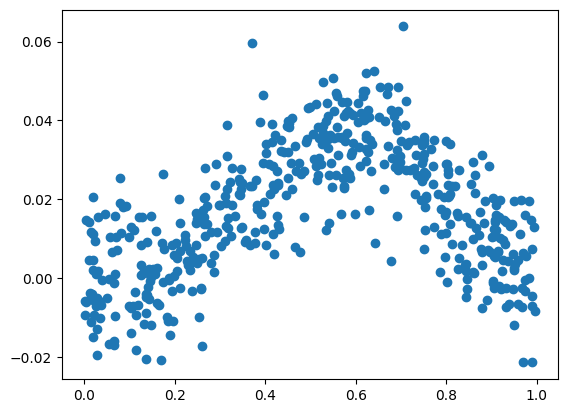

In [ ]:
plt.plot(x,y,"o")

plt.show()

##(c)
**[3pts] Set a random seed 123, and then compute the LOOCV errors that result from
fitting the polynomial functions of degree from 1 to 7 using the simulated data in (a):**

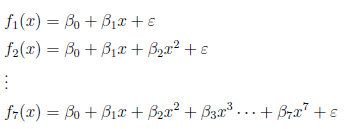

**(Hint: See Section 5.3 in ISLP for an example of how to implement cross-validation in R. You may find the following functions helpful)**

In [ ]:
!pip install ISLP

from sklearn.model_selection import cross_validate
from ISLP.models import sklearn_sm

import statsmodels.api as sm
def f(x):
    return x ** 5 - 2 * x ** 4 + x ** 3

np.random.seed(1)
x = np.random.uniform(0, 1, size=500)
y = f(x) + np.random.normal(0, 0.01, size=500)

np.random.seed(123)

cv_error = np.zeros(7)
H = np.array(x)
Y= np.array(y)
# if terms are not specified in sklean_sm, then sm.OLS uses all the columns in X without including an intercept term
#sk learn acts as a wrapper to allow our sm.OLS function that does OLS to be input into our cross_valiate function
M = sklearn_sm(sm.OLS)
for i, d in enumerate(range(1,8)):
    X = np.power.outer(H, np.arange(d+1))
    print(X.shape, d)
    M_CV = cross_validate(M, X, Y, cv=H.shape[0])
    cv_error[i] = np.mean(M_CV['test_score'])
cv_error

(500, 2) 1
(500, 3) 2
(500, 4) 3
(500, 5) 4
(500, 6) 5
(500, 7) 6
(500, 8) 7


array([0.00025406, 0.00012947, 0.00011138, 0.00010207, 0.00010134,
       0.00010176, 0.00010222])

##(d)
**[3pts] Repeat (c) using another random seed 12345, and report your results. Are your results the same as what you got in (c)? Why?**

In [ ]:
import statsmodels.api as sm
def f(x):
    return x ** 5 - 2 * x ** 4 + x ** 3

# Generate data
np.random.seed(1)
x = np.random.uniform(0, 1, size=500)
y = f(x) + np.random.normal(0, 0.01, size=500)

np.random.seed(12345)

cv_error = np.zeros(7)
H = np.array(x)
Y= np.array(y)
# if terms are not specified in sklean_sm, then sm.OLS uses all the columns in X without including an intercept term
M = sklearn_sm(sm.OLS)
for i, d in enumerate(range(1,8)):
    X = np.power.outer(H, np.arange(d+1))
    print(X.shape, d)
    M_CV = cross_validate(M, X, Y, cv=H.shape[0])
    cv_error[i] = np.mean(M_CV['test_score'])
cv_error

(500, 2) 1
(500, 3) 2
(500, 4) 3
(500, 5) 4
(500, 6) 5
(500, 7) 6
(500, 8) 7


array([0.00025406, 0.00012947, 0.00011138, 0.00010207, 0.00010134,
       0.00010176, 0.00010222])

There is no difference between different seeds set. This is because LOOCV will always be the same for the same data set, it is not random.

##(e)
**[3pts] Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer.**

The smallest LOOCV was fifth degree, but only by a tiny margin. I expected this because the data was originally generated using a fifth degree polynomial so the best model to fit to the data would also be fifth degree.

##(f)
**[3pts] Fit f5(x) using least squares. Comment on the coefficient estimates and their statistical significance.**

In [ ]:
def f(x):
    return x ** 5 - 2 * x ** 4 + x ** 3

np.random.seed(1)
x = np.random.uniform(0, 1, size=500)
y = f(x) + np.random.normal(0, 0.01, size=500)


X = np.power.outer(x, np.arange(6))
X_with_intercept = sm.add_constant(X)
model = sm.OLS(y, X_with_intercept)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     173.0
Date:                Mon, 17 Feb 2025   Prob (F-statistic):          4.22e-106
Time:                        02:56:28   Log-Likelihood:                 1596.2
No. Observations:                 500   AIC:                            -3180.
Df Residuals:                     494   BIC:                            -3155.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.002      0.320      0.7

The coefficients all have coefficients of P|t| over 0.05 except x5, so every coefficient is not statistically significant except the coefficient on x5.